In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import svd

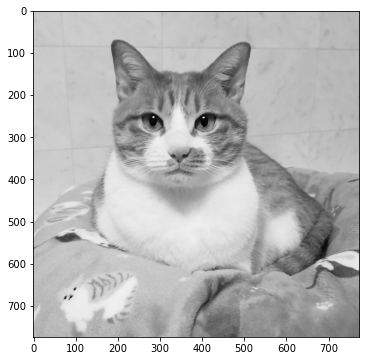

In [16]:
imgSrc  = './images/0.jpg'
imgData = Image.open(imgSrc).convert('LA') # Send to greyscale
plt.figure(figsize=(8,6))
plt.imshow(imgData)
plt.show()

## SVD stuff

In [17]:
def truncateSVD(A, k):
    U, S, Vt = svd(A)
    Ak = np.dot(U[:,:k],np.dot(np.diag(S[:k]),Vt[:k,:]))
    return Ak

def compressImg(img,k):
#   Send img to matrix
    imgMatrix = np.array(list(img.getdata(band=0)))
    imgMatrix.shape = (img.size[1],img.size[0])
    imgMatrix = np.matrix(imgMatrix) 
#   Compress with SVD
    compressedMatrix = truncateSVD(imgMatrix,k)
#   Convert back to img
    compressedImg = Image.fromarray(compressedMatrix)
    return compressedImg

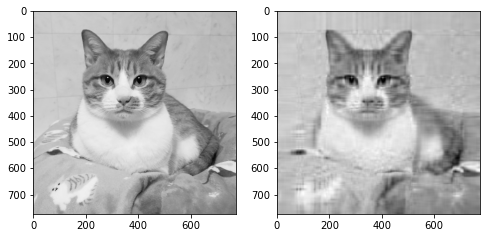

In [18]:
fig, (subfig0, subfig1) = plt.subplots(1,2, figsize=(8,6))
subfig0.imshow(imgData)
subfig1.imshow(compressImg(imgData,20))
plt.show()